Trabajo Computacional 1 - Aceleradores y detectores de partículas 

Grupo: Catalina Fuentes (202220750), Daniela León (), David Cantini ()

PARTE 1 - MONOCROMADOR

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# CODIGO
# Parámetros 
M = 1.0          # masa
q = 1.0          # carga
B = 1.0          # campo magnético (magnitud uniforme)
dt = 1e-4        # paso de tiempo
t_max = 10.0     # tiempo máximo de simulación 

# Condiciones iniciales ( arranca en (R0,0) y entra hacia +y)
R0 = 1.0
x = R0
y = 0.0
vx = 0.0
vy = 1.0

# Listas para guardar datos
xs, ys, ts, Rs = [], [], [], []

# Para detener cuando el ángulo llegue a 180 (pi)
theta_prev = np.arctan2(y, x)
theta_unwrapped = theta_prev

t = 0.0
while t <= t_max and theta_unwrapped < np.pi:
    R = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)

    # Fuerza magnética:
    # Fx = - q v B * (y/R)
    # Fy = - q v B * (x/R)
    # (si R=0, evitar división por cero)
    if R == 0:
        break

    Fx = -q * v * B * (y / R)
    Fy = -q * v * B * (x / R)

    ax = Fx / M
    ay = Fy / M

    # Euler-Feynman (Euler-Cromer): primero velocidad, luego posición
    vx = vx + ax * dt
    vy = vy + ay * dt
    x = x + vx * dt
    y = y + vy * dt

    t = t + dt

    # Guardar
    xs.append(x)
    ys.append(y)
    ts.append(t)
    Rs.append(np.sqrt(x**2 + y**2))

    # Ángulo theta = arctan(y/x) 
    theta_now = np.arctan2(y, x)

    # Desenvolver el ángulo para que crezca continuo hacia pi
    dtheta = theta_now - theta_prev
    if dtheta < -np.pi:
        dtheta += 2*np.pi
    elif dtheta > np.pi:
        dtheta -= 2*np.pi

    theta_unwrapped += dtheta
    theta_prev = theta_now

# Resultado al llegar a 180
x_exit = xs[-1] if xs else x
y_exit = ys[-1] if ys else y
R_exit = np.sqrt(x_exit**2 + y_exit**2)

print("Resultado (cuando theta ~ 180°):")
print(f"x_salida = {x_exit:.6f}")
print(f"y_salida = {y_exit:.6f}")
print(f"R_salida = {R_exit:.6f}")
print(f"-R (desde x) ~ {-x_exit:.6f}  (idealmente y~0 y x~-R)")



Resultado (cuando theta ~ 180°):
x_salida = -807.185211
y_salida = 806.650861
R_salida = 1141.154493
-R (desde x) ~ 807.185211  (idealmente y~0 y x~-R)


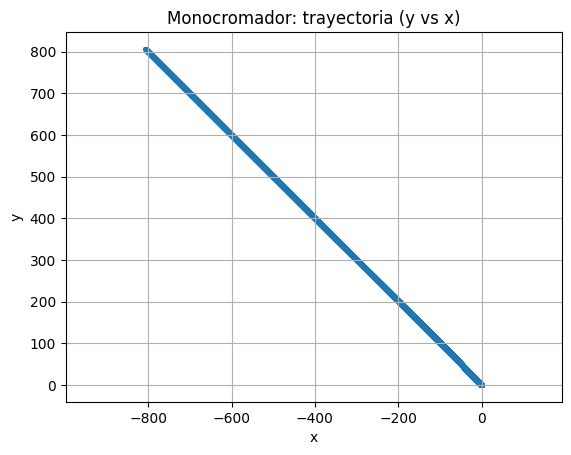

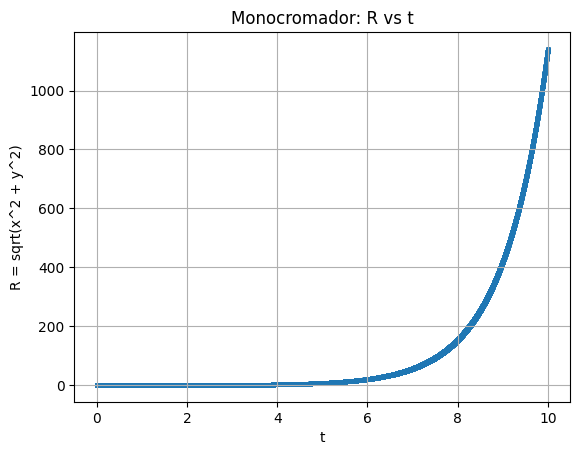

In [13]:
# PLOTS 

# 1) Scatterplot: y vs x (trayectoria)
plt.figure()
plt.scatter(xs, ys, s=6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Monocromador: trayectoria (y vs x)")
plt.axis("equal")
plt.grid(True)
plt.show()

# 2) Scatterplot: R vs t
plt.figure()
plt.scatter(ts, Rs, s=6)
plt.xlabel("t")
plt.ylabel("R = sqrt(x^2 + y^2)")
plt.title("Monocromador: R vs t")
plt.grid(True)
plt.show()
